<a href="https://colab.research.google.com/github/Reign2121/Perceptron/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Perceptron**

매개변수

eta : float

* 학습률 ( .0~1.0 사이의 실수값 )

n_iter : int

* 훈련 데이터셋 반복 횟수

random_state : int

* 가중치 무작위 초기화를 위한 난수 생성기 시드
  <랜덤으로 뿌린다.> 아니면 오래걸림
w_ : 1d-array

* 가중치 (w, b 모두 가중치다)

errors_ : list

* 에포크마다 초기화를 위한 난수 생성기 시드

X : {array-like}, shape = [n_sample, n_feature]

* n_sample 개의 샘플과 n_features 개의 특성으로 이루어진 훈련 데이터

y : array-like(유사배열), shape = [n_sample]

* 타깃 값

가중치보다 크면 넘긴다?
wx + wx + -b >0 or <0 = wx+ wx > b or < b

In [1]:
import numpy as np

링크드 어레이
싱글, 다중 스레드 알아두자

In [2]:
#매트릭스와 어레이의 차이
class Perceptron(object):
  
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
    
  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
    self.errors_ = []
    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X,y):
        update = self.eta * (target-self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update!=0.0)
      self.errors_.append(errors)
    return self

  def net_input(self, X):
    return np.dot(X, self.w_[1:] + self.w_[0]) #오류 존재 x shape과 가중치 shape이 다르다.
    #dot 내적 / 활성화 함수의 인풋을 만드는데, b를 따로 더해줘야 한다.
    #구현과 사용, 시험에 나온다.
  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)    

**퍼셉트론 훈련**

데이터 다운로드 

https://archive.ics.uci.edu/ml/machine-learning-datasets/iris/iris.data


In [3]:
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

df = pd.read_csv(url, header=None, encoding='utf-8')

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


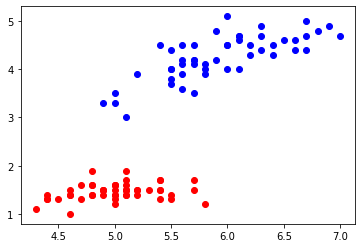

In [4]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values
y = np.where(y=='Iris-setosa', -1, 1)
X = df.iloc[0:100, [0,2]].values

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='o', label='versicolor')

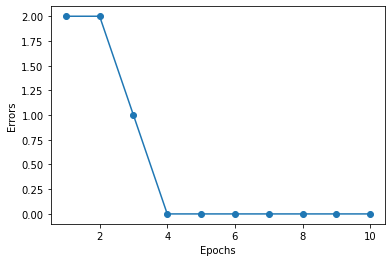

In [5]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Errors')
plt.show()

In [7]:
from matplotlib.colors import ListedColormap

In [6]:
def plot_decision_region(X, y, classifier, resolution=0.02):
  markers =('s','x','o','^','v')
  colors = ('red','blue','lightgreen','gray','cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:, 0].min()-1, X[:,0].max() + 1
  x2_min, x2_max = X[:, 1].min()-1, X[:,1].max() + 1

  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                         np.arange(x2_min, x2_max, resolution))
  
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)

  plt.contourf(xx1, xx2, Z, alpha=0.3)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl, 0],
                y=X[y==cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black')
  

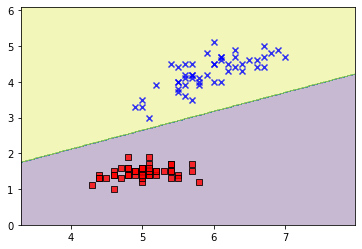

In [8]:
plot_decision_region(X, y, classifier=ppn)
plt.show()